In [1]:
# Import all libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import model_from_json
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warning message of tensorflow
import cv2
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.measure import compare_ssim
from skimage.util.shape import view_as_windows
import math

Using TensorFlow backend.


In [2]:
# Load X data
path1 = './Input/'
X_data = os.listdir(path1)
X_data = sorted(X_data)

X = []
window_shape = (32, 32)
for img in X_data:
    im = cv2.imread(path1 + img,0)
    patches = view_as_windows(im, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32)
    for i in range(0,len(patches)):
        X.append(patches[i])
        
X = np.array(X)
print(len(X))

/share/pkg/python/3.6.2/install/lib/python3.6/site-packages/skimage/util/shape.py:255: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr_in[slices].strides


396900


In [3]:
# Load Y data
path2 = './Label/'
Y_data = os.listdir(path2)
Y_data = sorted(Y_data)

Y = []
window_shape = (32, 32)
for img2 in Y_data:
    im2 = cv2.imread(path2 + img2,0)
    patches = view_as_windows(im2, window_shape, step=16)
    patches = patches.reshape(patches.shape[0]*patches.shape[1],32,32)
    for i in range(0,len(patches)):
        Y.append(patches[i])

Y = np.array(Y)
print(len(Y))


/share/pkg/python/3.6.2/install/lib/python3.6/site-packages/skimage/util/shape.py:255: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr_in[slices].strides


396900


In [4]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 32, 32, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 32, 32, 1)

X_train = X_train.astype('int') 
X_test = X_test.astype('int')
Y_train = Y_train.astype('int') 
Y_test = Y_test.astype('int')

# Normalization of data 
# Data pixels are between 0 and 1
# X_train /= 255
# X_test /= 255
# Y_train /= 255
# Y_test /= 255

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(317520, 32, 32, 1) (79380, 32, 32, 1) (317520, 32, 32, 1) (79380, 32, 32, 1)


In [5]:
model = Sequential()
model.add(Conv2D(128, (9, 9), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(1, (5, 5), activation='linear', padding='same'))

opt = Adam(lr = 0.003)

model.compile(loss='mean_absolute_error', optimizer = opt) 
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       10496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 1)         1601      
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=10, factor=0.1, min_lr=0.00001)
filepath="weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks = [EarlyStopping(monitor='loss', patience=20, verbose=1), reduce_lr, checkpoint]

# callbacks = [EarlyStopping(monitor='loss', patience=20, verbose=1), reduce_lr]

results = model.fit(X_train, Y_train, batch_size=512, epochs=200, validation_split = 0.2, shuffle = True, callbacks = callbacks)


Train on 254016 samples, validate on 63504 samples
Epoch 1/200
254016/254016 [==============================] - 18s - loss: 8.3260 - val_loss: 5.2148
Epoch 2/200
254016/254016 [==============================] - 16s - loss: 5.1290 - val_loss: 5.0445
Epoch 3/200
254016/254016 [==============================] - 16s - loss: 5.4219 - val_loss: 5.0058
Epoch 4/200
254016/254016 [==============================] - 16s - loss: 4.9568 - val_loss: 4.7368
Epoch 5/200
254016/254016 [==============================] - 16s - loss: 4.8300 - val_loss: 4.7044
Epoch 6/200
254016/254016 [==============================] - 16s - loss: 4.8565 - val_loss: 4.6901
Epoch 7/200
254016/254016 [==============================] - 16s - loss: 4.7946 - val_loss: 4.9406
Epoch 8/200
254016/254016 [==============================] - 16s - loss: 4.7933 - val_loss: 4.7278
Epoch 9/200
254016/254016 [==============================] - 16s - loss: 4.7412 - val_loss: 4.7326
Epoch 10/200
254016/254016 [==============================

254016/254016 [==============================] - 16s - loss: 4.5493 - val_loss: 4.5760
Epoch 36/200
254016/254016 [==============================] - 16s - loss: 4.5461 - val_loss: 4.5724
Epoch 37/200
254016/254016 [==============================] - 15s - loss: 4.5409 - val_loss: 4.5831
Epoch 38/200
254016/254016 [==============================] - 16s - loss: 4.5382 - val_loss: 4.5756
Epoch 39/200
254016/254016 [==============================] - 16s - loss: 4.5329 - val_loss: 4.5661
Epoch 40/200
254016/254016 [==============================] - 15s - loss: 4.5319 - val_loss: 4.5868
Epoch 41/200
254016/254016 [==============================] - 16s - loss: 4.5282 - val_loss: 4.5632
Epoch 42/200
254016/254016 [==============================] - 15s - loss: 4.5243 - val_loss: 4.5524
Epoch 43/200
254016/254016 [==============================] - 15s - loss: 4.5205 - val_loss: 4.5572
Epoch 44/200
254016/254016 [==============================] - 15s - loss: 4.5180 - val_loss: 4.5453
Epoch 45/200


254016/254016 [==============================] - 15s - loss: 4.4597 - val_loss: 4.4880
Epoch 68/200
254016/254016 [==============================] - 15s - loss: 4.4569 - val_loss: 4.4880
Epoch 69/200
254016/254016 [==============================] - 16s - loss: 4.4586 - val_loss: 4.4834
Epoch 70/200
254016/254016 [==============================] - 16s - loss: 4.4536 - val_loss: 4.4934
Epoch 71/200
254016/254016 [==============================] - 16s - loss: 4.4523 - val_loss: 4.4807
Epoch 72/200
254016/254016 [==============================] - 16s - loss: 4.4503 - val_loss: 4.5620
Epoch 73/200
254016/254016 [==============================] - 16s - loss: 4.4513 - val_loss: 4.5185
Epoch 74/200
254016/254016 [==============================] - 15s - loss: 4.4492 - val_loss: 4.4854
Epoch 75/200
254016/254016 [==============================] - 16s - loss: 4.4472 - val_loss: 4.5016
Epoch 76/200
254016/254016 [==============================] - 16s - loss: 4.4480 - val_loss: 4.4991
Epoch 77/200


254016/254016 [==============================] - 15s - loss: 4.4255 - val_loss: 4.4720
Epoch 102/200
254016/254016 [==============================] - 15s - loss: 4.4254 - val_loss: 4.4720
Epoch 103/200
254016/254016 [==============================] - 16s - loss: 4.4253 - val_loss: 4.4806
Epoch 104/200
254016/254016 [==============================] - 16s - loss: 4.4243 - val_loss: 4.4861
Epoch 105/200
254016/254016 [==============================] - 16s - loss: 4.4234 - val_loss: 4.4550
Epoch 106/200
254016/254016 [==============================] - 16s - loss: 4.4242 - val_loss: 4.4611
Epoch 107/200
254016/254016 [==============================] - 15s - loss: 4.4223 - val_loss: 4.4535
Epoch 108/200
254016/254016 [==============================] - 15s - loss: 4.4220 - val_loss: 4.4527
Epoch 109/200
254016/254016 [==============================] - 16s - loss: 4.4232 - val_loss: 4.4555
Epoch 110/200
254016/254016 [==============================] - 16s - loss: 4.4206 - val_loss: 4.4547
Epoc

254016/254016 [==============================] - 16s - loss: 4.4111 - val_loss: 4.4785
Epoch 137/200
254016/254016 [==============================] - 15s - loss: 4.4120 - val_loss: 4.4418
Epoch 138/200
254016/254016 [==============================] - 15s - loss: 4.4116 - val_loss: 4.4621
Epoch 139/200
254016/254016 [==============================] - 16s - loss: 4.4093 - val_loss: 4.4607
Epoch 140/200
254016/254016 [==============================] - 15s - loss: 4.4109 - val_loss: 4.4391
Epoch 141/200
254016/254016 [==============================] - 15s - loss: 4.4101 - val_loss: 4.4424
Epoch 142/200
254016/254016 [==============================] - 16s - loss: 4.4113 - val_loss: 4.4395
Epoch 143/200
254016/254016 [==============================] - 16s - loss: 4.4095 - val_loss: 4.4438
Epoch 144/200
254016/254016 [==============================] - 15s - loss: 4.4097 - val_loss: 4.4435
Epoch 145/200
254016/254016 [==============================] - 15s - loss: 4.4083 - val_loss: 4.4382
Epoc

254016/254016 [==============================] - 16s - loss: 4.4024 - val_loss: 4.4449
Epoch 174/200
254016/254016 [==============================] - 15s - loss: 4.4039 - val_loss: 4.4457
Epoch 175/200
254016/254016 [==============================] - 16s - loss: 4.4008 - val_loss: 4.4321
Epoch 176/200
254016/254016 [==============================] - 16s - loss: 4.4028 - val_loss: 4.4421
Epoch 177/200
254016/254016 [==============================] - 15s - loss: 4.4003 - val_loss: 4.4334
Epoch 178/200
254016/254016 [==============================] - 16s - loss: 4.4016 - val_loss: 4.4330
Epoch 179/200
254016/254016 [==============================] - 15s - loss: 4.4028 - val_loss: 4.4328
Epoch 180/200
254016/254016 [==============================] - 16s - loss: 4.4005 - val_loss: 4.4377
Epoch 181/200
254016/254016 [==============================] - 15s - loss: 4.4012 - val_loss: 4.4351
Epoch 182/200
254016/254016 [==============================] - 16s - loss: 4.4006 - val_loss: 4.4341
Epoc

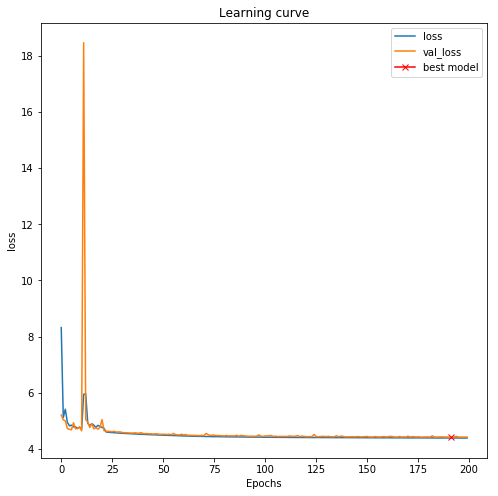

In [7]:
train_loss = results.history['loss']
val_loss = results.history['val_loss'] 
# train_acc = results.history['acc']
# val_acc = results.history['val_acc']

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

In [ ]:
# score = model.evaluate(X_test, Y_test, verbose=0) # accuracy check
# print(score.shape)
# print('Test loss:', score[0]) # Prints test loss

In [8]:
# Save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to H5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
# Load model and weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("weights.best.h5")
# loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


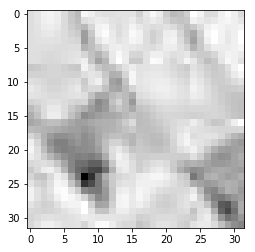

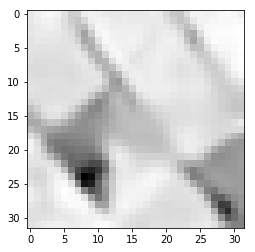

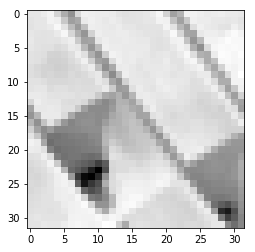

In [12]:
k = 25
test_img = X_test[k].reshape(1, 32, 32, 1)
pred_img = model.predict(test_img)
pred_img = pred_img.reshape(32,32)
pred_img = pred_img.astype('int') 

plt.imshow(X_test[k].reshape(32,32), cmap='gray')
plt.figure()
plt.imshow(pred_img, cmap='gray')
plt.figure()
plt.imshow(Y_test[k].reshape(32,32), cmap='gray')

Y_test_img = Y_test[k].reshape(32,32)
X_test_img = X_test[k].reshape(32,32)

In [13]:
# Compute MSE
print('MSE (Y, X): ', mean_squared_error(Y_test_img, X_test_img))
print('MSE (Y , Predict): ', mean_squared_error(Y_test_img, pred_img))

# Compute MAE
print('\nMAE (Y, X): ', mean_absolute_error(Y_test_img, X_test_img))
print('MAE (Y , Predict): ', mean_absolute_error(Y_test_img, pred_img))

# Compute SSIM
(score1, diff1) = compare_ssim(Y_test_img, X_test_img, full=True)
print('\nSSIM (Y, X): ', score1)
(score2, diff2) = compare_ssim(Y_test_img, pred_img, full=True)
print('SSIM (Y, Predict): ', score2)

MSE (Y, X):  66.3505859375
MSE (Y , Predict):  41.9853515625

MAE (Y, X):  6.2470703125
MAE (Y , Predict):  4.5263671875

SSIM (Y, X):  1.0
SSIM (Y, Predict):  1.0


/share/pkg/python/3.6.2/install/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


In [ ]:
# Compute PSNR
def psnr(img1, img2):
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

psnr_X_test = psnr(Y_test_img, X_test_img)
print('\nPSNR (Y, X): ', psnr_X_test)
psnr_predict = psnr(Y_test_img, pred_img)
print('PSNR (Y, Pred): ', psnr_predict)

In [ ]:
err_X_img = abs(Y_test_img - X_test_img)
plt.imshow(err_X_img)

err_pred_img = abs(Y_test_img - pred_img)
plt.figure()
plt.imshow(err_pred_img)